Khai báo thư viện cần thiết

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, f1_score

Load file từ máy tính

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df['diagnosis'].replace({"B":"0", "M":"1"}, inplace=True)

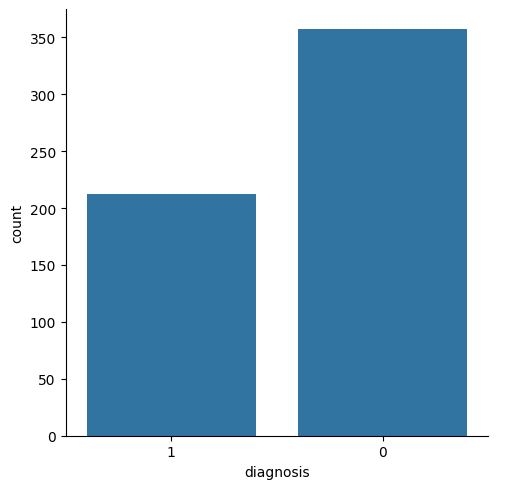

In [4]:
sns.catplot(x='diagnosis', data=df, kind='count') # catplot (Categorical Plot)

In [73]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [74]:
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


Thực hiện rời rạc hóa dữ liệu
+ B1: khởi tạo bộ rời rạc hóa discretizer
+ B2: rời rạc hóa các trường thuộc tính theo khoảng tứ phân vị: 25% giá trị bé nhất là 0, sau đó lần lượt là 1, 2, 3

In [75]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [76]:
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
# uniform là chia đều các khoảng, còn quantile là chia dựa trên phân vị
discretized_values = discretizer.fit_transform(X)

X = discretized_values
X = pd.DataFrame(X)
X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,2.0,0.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,...,2.0,0.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0
1,2.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,...,2.0,1.0,2.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0
2,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,0.0,...,2.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0
3,0.0,1.0,0.0,0.0,3.0,3.0,2.0,2.0,3.0,3.0,...,0.0,1.0,0.0,0.0,3.0,3.0,2.0,3.0,3.0,3.0
4,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0
5,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,2.0,...,1.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0
6,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,2.0,1.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0
7,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,2.0,2.0,...,1.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0
8,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,2.0,2.0,...,1.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,2.0,1.0
9,1.0,1.0,1.0,0.0,2.0,2.0,2.0,1.0,1.0,2.0,...,1.0,3.0,0.0,0.0,3.0,3.0,3.0,3.0,2.0,3.0


Phân chia tập train_test theo tỉ lệ 7 : 3 theo chiến lược Stratify Sampling

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30, stratify=y)

Các thuật toán sẽ dùng

In [78]:
Algorithm = ['RandomForestClassifier','DecisionTreeClassifier']
Accuracy=[] # list lưu trữ độ chính xác của các mô hình học máy

In [ ]:
def algorithm(model):
  model.fit(X_train, y_train) # huấn luyện mô hình
  prediction = model.predict(X_test) # dự đoán nhãn của tập X_test

  # In ra ma trận nhầm lẫn
  print('confusion matrix')
  # kích thước cm là 2x2, với 2 hàng và 2 cột với các giá trị là số nguyên
  cm = confusion_matrix(y_test,prediction)

  # Tạo nhãn cho ma trận nhầm lẫn
  group_names = ["True Negative","False Positive",'False Negative',"True Positive"] # Khởi tạo tên cho các nhóm
  group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()] 
  group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  # Chuyển labels thành mảng numpy kích thước 2x2
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

  plt.title("Confusion Matrix")
  plt.xlabel('predicted label')
  plt.ylabel('True label')
  plt.show()

  print(cm)
  print(classification_report(y_test,prediction))

  weighted_f1 = f1_score(y_test, prediction, average='weighted')

  final_score = weighted_f1*100
  print('weighted_f1_score : ' , final_score)
  Accuracy.append(weighted_f1*100)

**Ramdom Forest Classification**

Các tham số quan trọng trong Ramdom Forest Classification

  + **n_estimators:** Số lượng cây sẽ sử dụng

  + **max_depth**: Độ sâu của từng cây

  + **max_features**: Số lượng đặc trưng dựa vào số mẫu dữ liệu

  + **bootstrap và oob_score**: để lấy mẫu dữ liệu với hoàn lại và oob_score=True để đánh giá mô hình bằng các mẫu không được lấy để huấn luyện (out-of-bag samples).

  + **class_weight:** quyết định xem nên đặt trọng số cân bằng cho từng cây hay không


Sau đây ta sẽ sử dụng GridSearchCV để chọn ra bộ tham số tối ưu

In [80]:
#Thiết lập bộ tham số
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'oob_score': [True, False],   # oob_score chỉ có tác dụng nếu bootstrap=True
    'class_weight': ['balanced', 'balanced_subsample']
}

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(random_state=42)

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=make_scorer(f1_score, average='weighted'), n_jobs=-1)

# Huấn luyện GridSearchCV trên dữ liệu huấn luyện
grid_search.fit(X_train, y_train)

# Kết quả
print("Best parameters found: ", grid_search.best_params_)
RF_bootstrap = grid_search.best_params_['bootstrap']
RF_class_weight = grid_search.best_params_['class_weight']
RF_max_depth = grid_search.best_params_['max_depth']
RF_max_features = grid_search.best_params_['max_features']
RF_n_estimators = grid_search.best_params_['n_estimators']
RF_oob_score = grid_search.best_params_['oob_score']

print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50, 'oob_score': True}
Best cross-validation score:  nan


confusion matrix


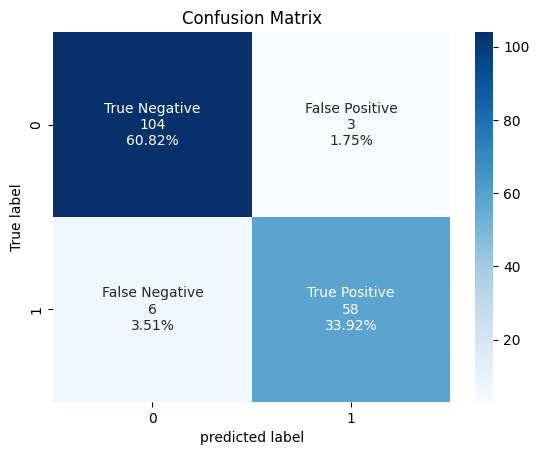

[[104   3]
 [  6  58]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.95      0.91      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

weighted_f1_score :  94.71006548629639


['model_1.joblib']

In [86]:
model_1 = RandomForestClassifier(
    bootstrap=RF_bootstrap,
    class_weight=RF_class_weight,
    max_depth=RF_max_depth,
    max_features=RF_max_features,
    n_estimators=RF_n_estimators,
    oob_score=RF_oob_score
)

algorithm(model_1)
from joblib import dump

# Giả sử model_1 và model_2 là các mô hình đã huấn luyện
# ở đây lưu những gì, lưu các tham số của mô hình à, còn kết quả huấn luyện có lưu không? 
# Có, nếu muốn lưu kết quả huấn luyện thì phải lưu thêm biến Accuracy
dump(model_1, 'model_1.joblib')  # Lưu model_1 vào file model_1.joblib


**Decision Tree**

Một số tham số quan trọng để điều chỉnh nhằm tránh overfitting và tăng độ chính xác:

1. **Max_depth:** Giới hạn độ sâu tối đa của cây để tránh cây phát triển quá sâu, giúp giảm overfitting.

2. **Min_samples_split:** Thiết lập số lượng mẫu tối thiểu để phân chia một nút. Tăng giá trị này sẽ làm cây ít phân nhánh, giúp giảm overfitting.

3. **Min_samples_leaf:** Đặt số lượng mẫu tối thiểu ở mỗi nút lá. Tăng giá trị này sẽ giúp cây tổng quát hóa tốt hơn.

4. **Max_features:** Chỉ định số lượng đặc trưng để xem xét khi tìm cách phân chia dữ liệu. Giảm số lượng đặc trưng có thể giúp tránh overfitting.

5. **Ccp_alpha:** Tham số này để kiểm soát mức độ tỉa cây và tránh overfitting

**Cách ccp_alpha hoạt động**

  + **Giá trị của ccp_alpha càng lớn** sẽ càng khuyến khích mô hình loại bỏ các nhánh nhỏ, dẫn đến cây nông hơn và đơn giản hơn.

  + **Khi ccp_alpha = 0:** Không có nhánh nào bị loại bỏ, cây sẽ phát triển hết mức có thể.

  + **Khi ccp_alpha tăng:** Các nhánh ít quan trọng hơn sẽ bị cắt dần, giảm độ sâu và độ phức tạp của cây, giúp giảm overfitting.

Ta sẽ thử với tất cả các tham số khác nhau với GridSearchCV rồi chọn ra bộ tham số tối ưu cho bài toán này

In [82]:
param_grid = {
    'max_depth': [ 4, 6, 8, 10, 12, 14, 16, 18],
    'min_samples_split': [5, 9, 13, 14, 15, 20],
    'min_samples_leaf': [1, 3, 5, 7],
    'max_features': ['sqrt', 'log2', None],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring=make_scorer(f1_score, average='weighted'))
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
DT_max_depth = grid_search.best_params_['max_depth']
DT_min_samples_split = grid_search.best_params_['min_samples_split']
DT_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
DT_max_features = grid_search.best_params_['max_features']
DT_ccp_alpha = grid_search.best_params_['ccp_alpha']

print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'ccp_alpha': 0.0, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation score: nan


confusion matrix


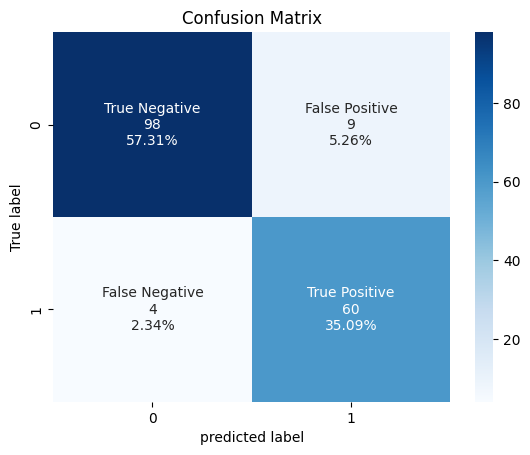

[[98  9]
 [ 4 60]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       107
           1       0.87      0.94      0.90        64

    accuracy                           0.92       171
   macro avg       0.92      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171

weighted_f1_score :  92.44962485959715


['model_2.joblib']

In [83]:
model_2 = DecisionTreeClassifier(random_state=42,max_depth=DT_max_depth,min_samples_split=DT_min_samples_split,min_samples_leaf=DT_min_samples_leaf,max_features=DT_max_features,ccp_alpha=DT_ccp_alpha)
algorithm(model_2)

from joblib import dump

# Giả sử model_1 và model_2 là các mô hình đã huấn luyện
dump(model_2, 'model_2.joblib')  # Lưu model_2

In ra Accuracy


In [84]:
score = pd.DataFrame({'Algorithm':Algorithm,'Weighted_f1':Accuracy })
score

,Algorithm,Weighted_f1
0,RandomForestClassifier,95.306167
1,DecisionTreeClassifier,92.449625


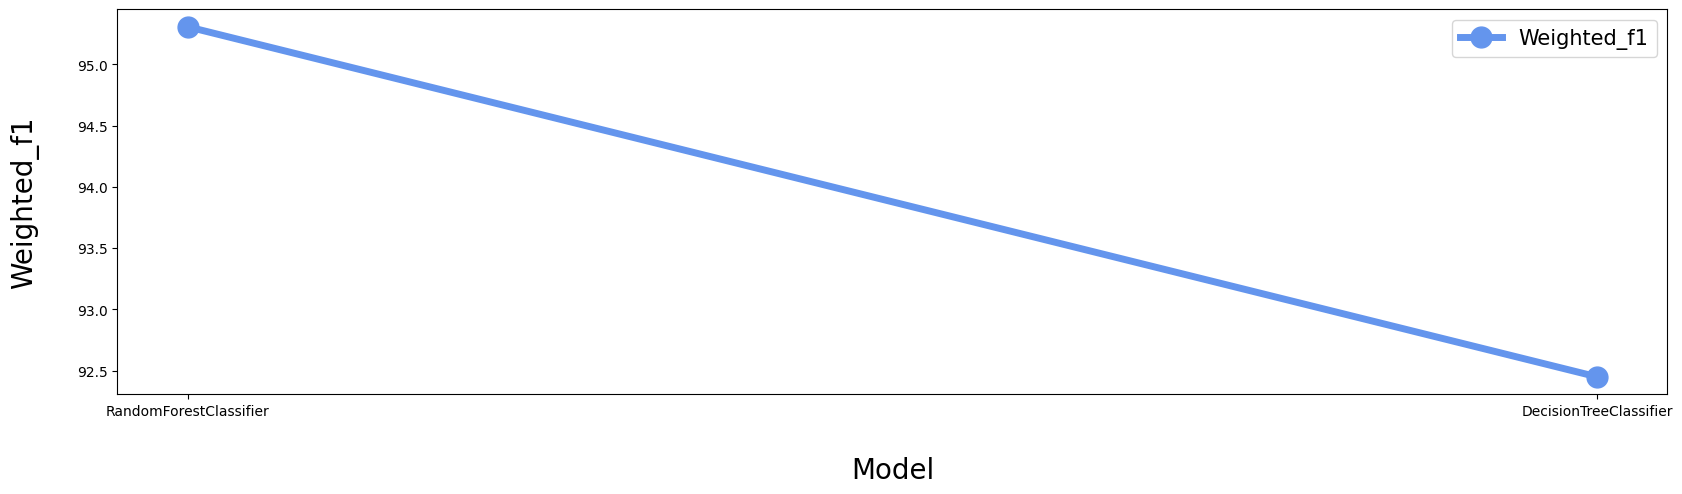

In [85]:
fig = plt.figure(figsize=(20,5))
plt.plot(score.Algorithm,score.Weighted_f1,label='Weighted_f1',lw=5,color='CornflowerBlue',marker='o',markersize = 15)
plt.legend(fontsize=15)
plt.xlabel('\nModel',fontsize= 20)
plt.ylabel('Weighted_f1\n',fontsize= 20)
plt.show()